In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import os
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [129]:
df = acquire.get_competition_data()

In [130]:
df = prepare.prepare_competition_data(df)

In [131]:
df['event_score'] = df.event_score.astype(float)

In [132]:
df = df.drop(columns=['last_name', 'short_best', 'short_place', 'short_elements_rank', 'short_components_rank', 'short_overall', 'free_elements_rank', 'free_components_rank', 'free_overall', 'olympian',  'free_place', 'free_best', 'event_best', 'first_name', 'short_combo_jump', 'short_solo_jump', 'short_axel_jump', 'free_elements'])

In [133]:
df = df.drop(columns=['country_flag'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1856
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   event_final_place         1127 non-null   int64  
 1   short_score               1127 non-null   float64
 2   free_score                1127 non-null   float64
 3   event_score               1127 non-null   float64
 4   skater_name               1127 non-null   object 
 5   short_elements_score      1127 non-null   float64
 6   short_components_score    1127 non-null   float64
 7   country                   1127 non-null   object 
 8   free_elements_score       1127 non-null   float64
 9   free_components_score     1127 non-null   float64
 10  season                    1127 non-null   int64  
 11  event                     1127 non-null   object 
 12  free_deductions           1127 non-null   float64
 13  short_deductions          1127 non-null   float64
 14  event_de

In [135]:
df2006 = pd.DataFrame(df[(df.season <= 2006)].where(df.event != 'olympics'))
o2006 = pd.DataFrame(df[df.season == 2006].where(df.event == 'olympics'))
df2010 = pd.DataFrame(df[(df.season <= 2010)].where(df.event != 'olympics'))
o2010 = pd.DataFrame(df[df.season == 2010].where(df.event == 'olympics'))
df2014 = pd.DataFrame(df[(df.season <= 2014)].where(df.event != 'olympics'))
o2014 = pd.DataFrame(df[df.season == 2014].where(df.event == 'olympics'))
df2018 = pd.DataFrame(df[(df.season <= 2018)].where(df.event != 'olympics'))
o2018 = pd.DataFrame(df[df.season == 2018].where(df.event == 'olympics'))
df2022 = pd.DataFrame(df[(df.season <= 2022)].where(df.event != 'olympics'))
o2022 = pd.DataFrame(df[df.season == 2022].where(df.event == 'olympics'))

In [136]:
df2006 = df2010.dropna()
o2006 = o2010.dropna()
df2010 = df2010.dropna()
o2010 = o2010.dropna()
df2014 = df2014.dropna()
o2014 = o2014.dropna()
df2018 = df2018.dropna()
o2018 = o2018.dropna()
df2022 = df2022.dropna()
o2022 = o2022.dropna()

In [137]:
o2006 = o2006[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score']]
o2010 = o2010[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score']]
o2014 = o2014[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score']]
o2018 = o2018[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score']]
o2022 = o2022[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score']]

In [138]:
o2006 = o2006.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2010 = o2010.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2014 = o2014.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2018 = o2018.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2022 = o2022.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})

In [139]:
df2006 = df2006.groupby(df2006.skater_name).agg(['min', 'mean', max])
df2010 = df2010.groupby(df2010.skater_name).agg(['min', 'mean', max])
df2014 = df2014.groupby(df2014.skater_name).agg(['min', 'mean', max])
df2018 = df2018.groupby(df2018.skater_name).agg(['min', 'mean', max])
df2022 = df2022.groupby(df2022.skater_name).agg(['min', 'mean', max])

In [141]:
df2006.columns = df2006.columns.get_level_values(0) + '_' +  df2006.columns.get_level_values(1)
df2010.columns = df2010.columns.get_level_values(0) + '_' +  df2010.columns.get_level_values(1)
df2014.columns = df2014.columns.get_level_values(0) + '_' +  df2014.columns.get_level_values(1)
df2018.columns = df2018.columns.get_level_values(0) + '_' +  df2018.columns.get_level_values(1)
df2022.columns = df2022.columns.get_level_values(0) + '_' +  df2022.columns.get_level_values(1)

In [142]:
df06 = df2006.merge(o2006, on='skater_name')
df10 = df2010.merge(o2010, on='skater_name')
df14 = df2014.merge(o2014, on='skater_name')
df18 = df2018.merge(o2018, on='skater_name')
df22 = df2022.merge(o2022, on='skater_name')

In [145]:
df = pd.concat([df06, df10, df14, df18, df22], axis=0)

In [146]:
df

,skater_name,event_final_place_min,event_final_place_mean,event_final_place_max,short_score_min,short_score_mean,short_score_max,free_score_min,free_score_mean,free_score_max,...,jump_errors_costly_max,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score
0,Akiko Suzuki,1.0,2.750000,5.0,53.10,56.430000,59.52,94.62,110.075000,117.14,...,0.0,japan,8.0,61.02,33.10,27.92,60.98,59.44,120.42,181.44
1,Alena Leonova,2.0,5.000000,7.0,44.04,53.983333,61.60,93.23,100.945000,110.73,...,2.0,russia,9.0,62.14,33.90,28.24,55.84,54.48,110.32,172.46
2,Anastasia Gimazetdinova,7.0,13.300000,21.0,34.54,43.533000,50.84,60.29,72.082000,80.93,...,3.0,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65
3,Carolina Kostner,1.0,5.000000,12.0,45.38,56.246000,67.15,71.42,97.209000,120.40,...,3.0,italy,16.0,63.02,33.34,29.68,34.84,57.04,88.88,151.90
4,Cynthia Phaneuf,1.0,8.200000,20.0,42.95,49.437000,57.76,76.90,88.756000,101.90,...,5.0,canada,12.0,57.16,31.80,26.36,48.94,51.52,99.46,156.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Olga Mikutina,8.0,10.000000,12.0,57.09,62.135000,67.18,104.00,117.795000,131.59,...,3.0,austria,14.0,61.14,32.54,28.60,61.12,59.94,121.06,182.20
18,Viktoriia Safonova,7.0,7.500000,8.0,58.19,61.220000,64.25,120.32,123.885000,127.45,...,1.0,belarus,13.0,61.46,32.72,28.74,65.54,57.83,123.37,184.83
19,Wakaba Higuchi,2.0,4.615385,11.0,62.58,67.599231,73.26,109.34,128.440000,145.01,...,2.0,japan,5.0,73.51,39.53,33.98,72.67,69.26,140.93,214.44
20,Yelim Kim,7.0,8.666667,11.0,61.23,68.473333,73.63,115.70,120.876667,128.78,...,2.0,south_korea,9.0,67.78,35.27,32.51,68.61,66.24,134.85,202.63


In [147]:
df.country.value_counts()

japan             14
usa               12
russia            10
south_korea        9
canada             8
finland            5
germany            5
china              5
italy              5
hungary            3
switzerland        3
georgia            3
estonia            2
turkey             2
uzbekistan         2
australia          2
france             2
belgium            2
azerbaijan         1
austria            1
czech_republic     1
kazakhstan         1
poland             1
bulgaria           1
slovakia           1
belarus            1
Name: country, dtype: int64

In [148]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [149]:
train

,skater_name,event_final_place_min,event_final_place_mean,event_final_place_max,short_score_min,short_score_mean,short_score_max,free_score_min,free_score_mean,free_score_max,...,jump_errors_costly_max,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score
9,Kanako Murakami,1.0,4.333333,8.0,49.24,57.075833,66.64,94.06,109.609167,123.09,...,3.0,japan,12.0,55.60,26.72,28.88,56.96,58.42,115.38,170.98
2,Anastasia Gimazetdinova,7.0,13.300000,21.0,34.54,43.533000,50.84,60.29,72.082000,80.93,...,3.0,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65
15,Yuna Kim,1.0,1.625000,3.0,58.32,67.020417,76.28,105.80,125.640000,148.34,...,2.0,south_korea,2.0,74.92,39.03,35.89,69.69,74.50,144.19,219.11
10,Kaori Sakamoto,1.0,3.454545,6.0,64.08,71.608182,76.86,125.12,140.327273,153.91,...,1.0,japan,3.0,79.84,43.22,36.62,78.90,74.39,153.29,233.13
19,Xiangning Li,8.0,11.400000,14.0,54.55,56.576000,59.20,102.72,110.394000,117.09,...,3.0,china,22.0,52.46,27.27,26.19,50.56,51.41,101.97,154.43
0,Adelina Sotnikova,2.0,4.000000,9.0,53.74,60.201250,68.38,100.87,111.102500,129.80,...,3.0,russia,1.0,74.64,39.09,35.55,75.54,74.41,149.95,224.59
19,Wakaba Higuchi,2.0,4.615385,11.0,62.58,67.599231,73.26,109.34,128.440000,145.01,...,2.0,japan,5.0,73.51,39.53,33.98,72.67,69.26,140.93,214.44
15,Mariah Bell,1.0,6.000000,12.0,52.73,64.037143,76.48,108.21,128.710714,142.64,...,4.0,usa,10.0,65.38,33.43,32.95,68.25,68.67,136.92,202.30
9,Kiira Korpi,2.0,7.500000,14.0,42.98,52.908750,61.20,84.63,93.730000,102.07,...,1.0,finland,11.0,52.96,27.72,26.24,54.93,53.68,108.61,161.57
12,Maé-Bérénice Méité,5.0,7.700000,14.0,41.69,52.424000,56.90,88.78,100.148000,111.51,...,3.0,france,10.0,58.63,30.83,27.80,60.86,56.04,115.90,174.53


### Distributions of features
- where it makes sense (ie. do not need distribution of skater placement as there will clearly be a place assigned to each skater based on results)

<AxesSubplot:title={'center':'Feature Correlation (contiuous variables) to event score'}>

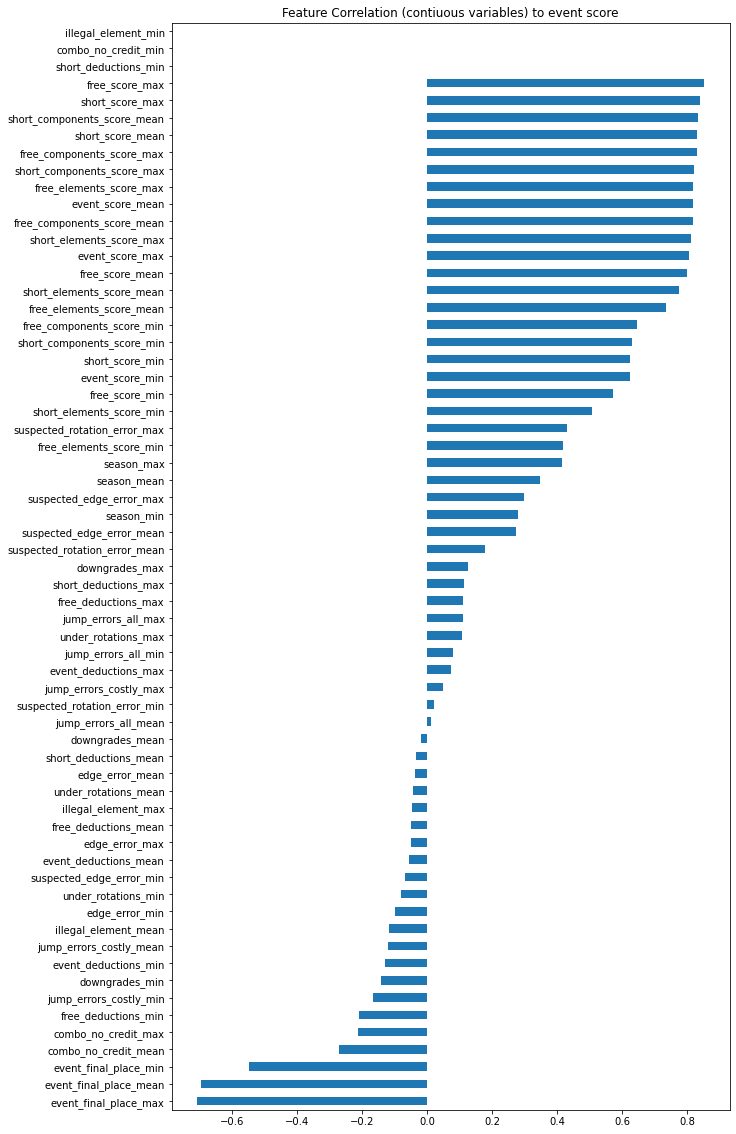

In [157]:
plt.figure(figsize=(10, 20))
# sets the size of the graph
plt.title("Feature Correlation (contiuous variables) to event score")
corr_chart = train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score']).sort_values().plot.barh()
corr_chart

In [161]:
X_train = train.drop(columns=['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score'])

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3573017000.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3573017000.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

<Figure size 432x288 with 0 Axes>

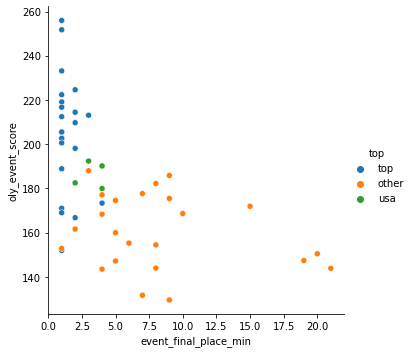

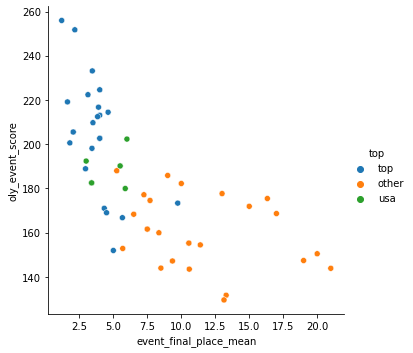

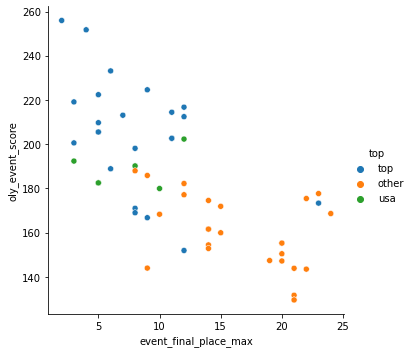

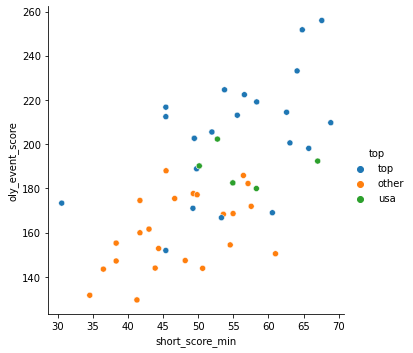

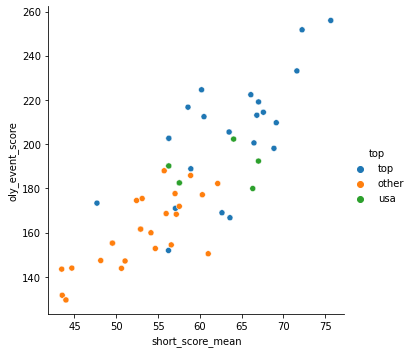

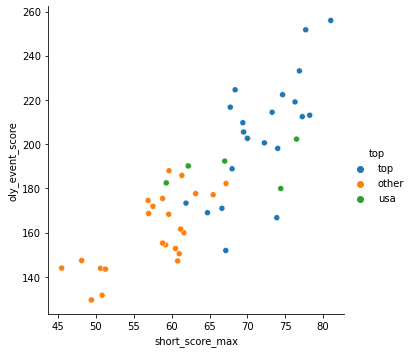

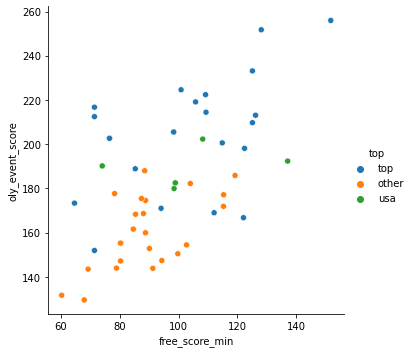

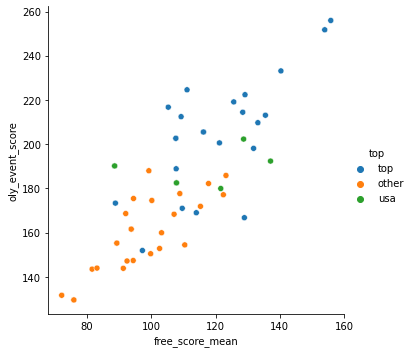

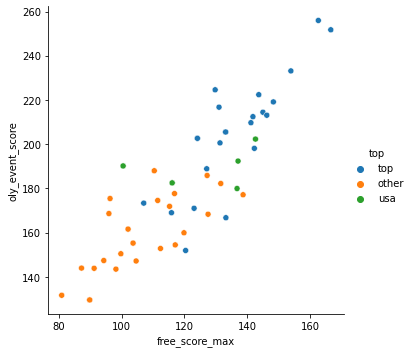

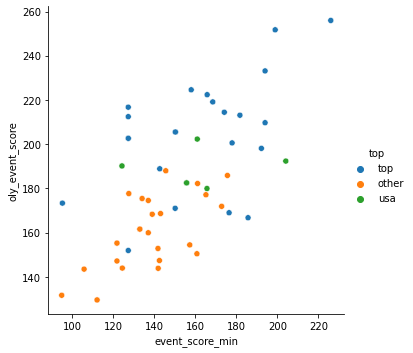

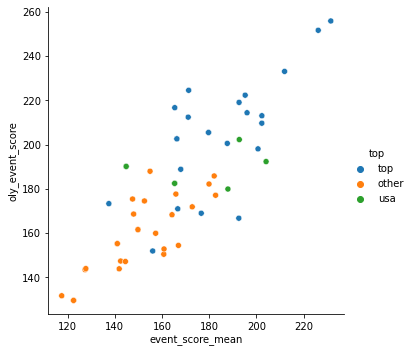

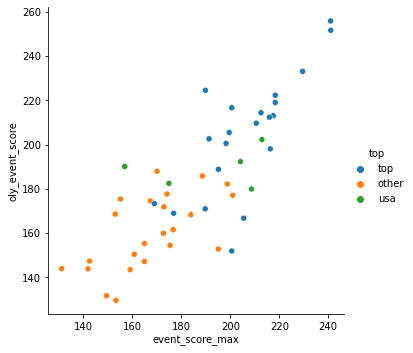

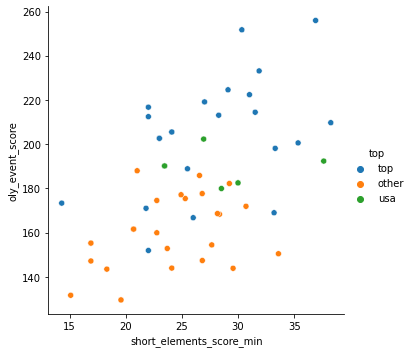

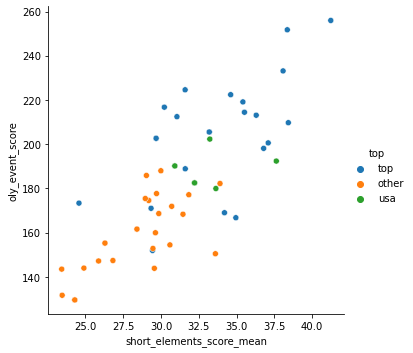

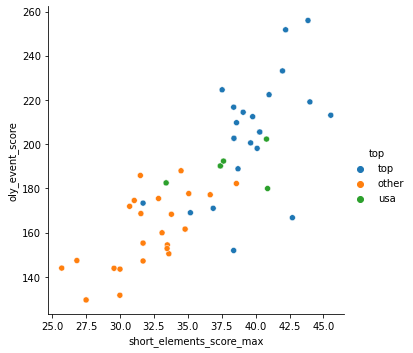

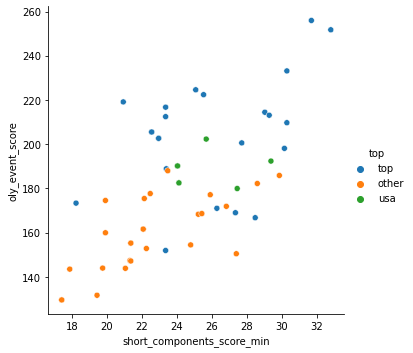

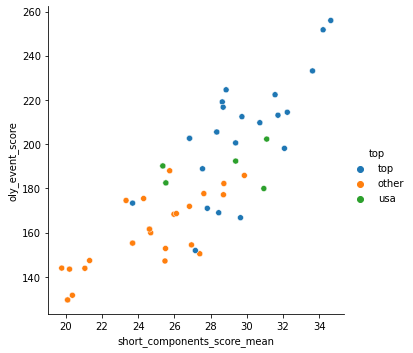

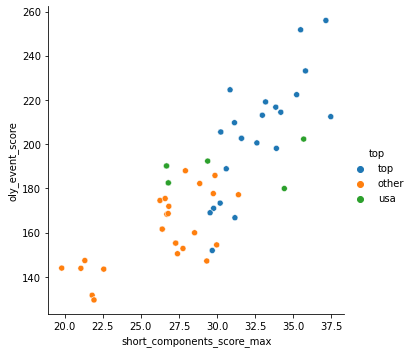

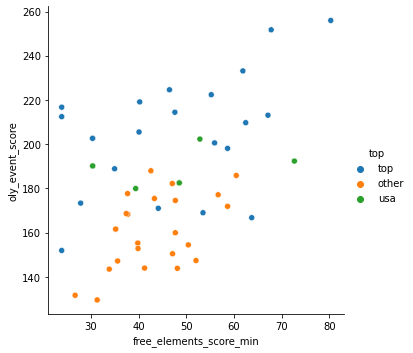

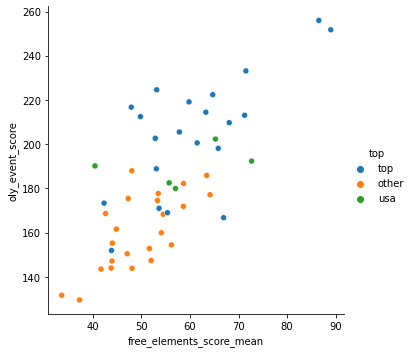

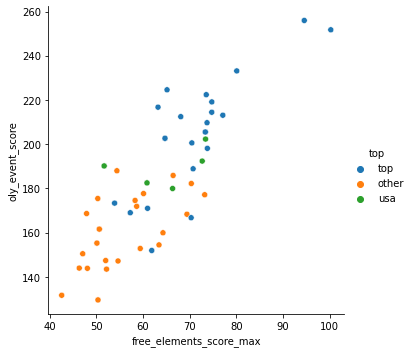

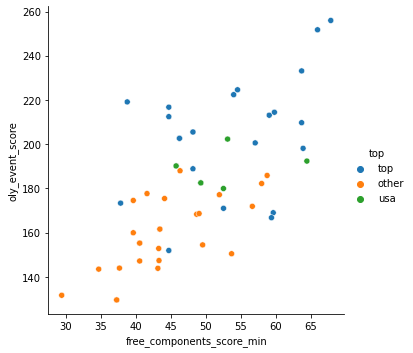

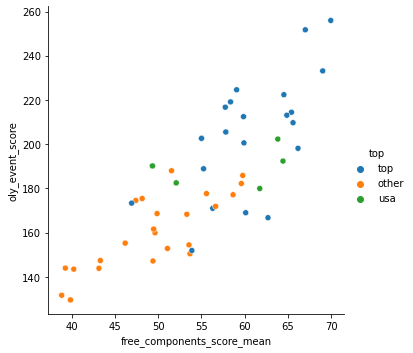

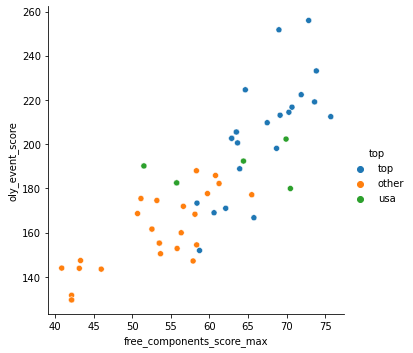

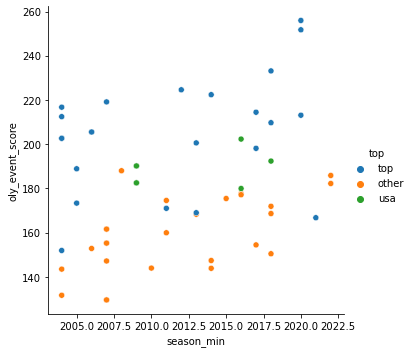

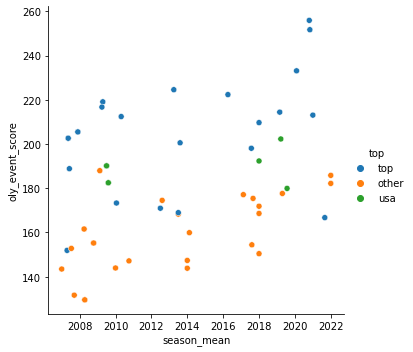

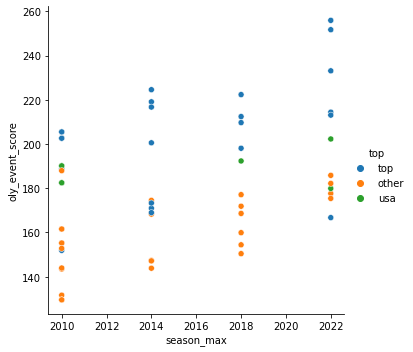

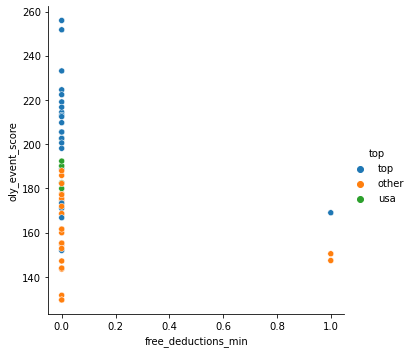

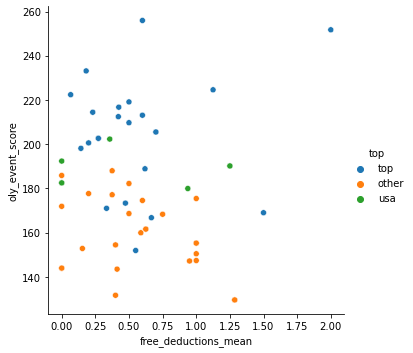

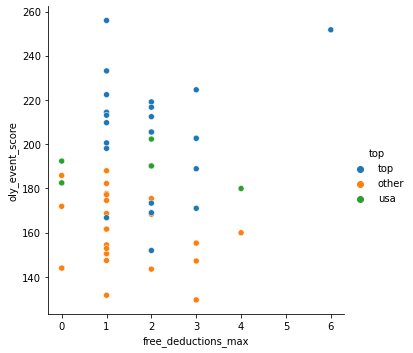

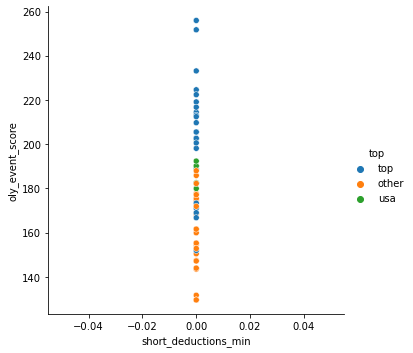

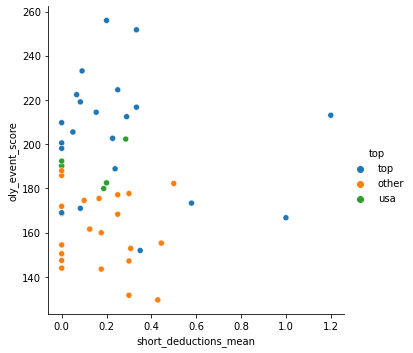

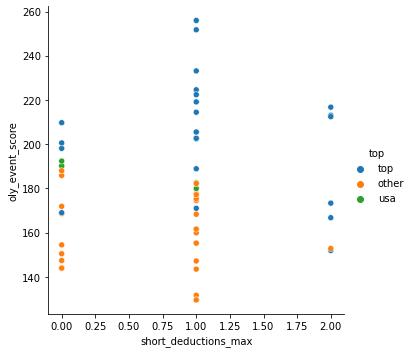

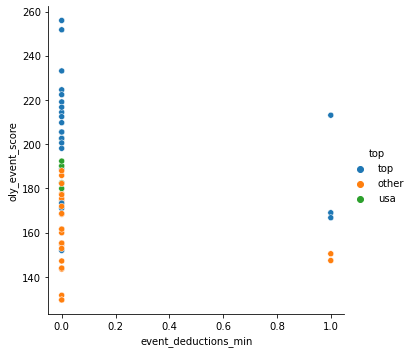

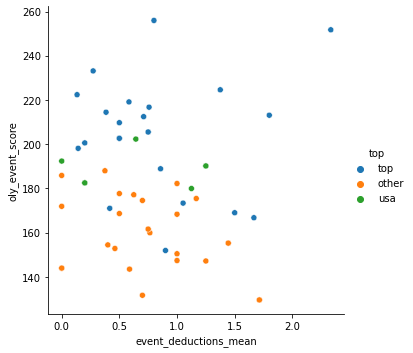

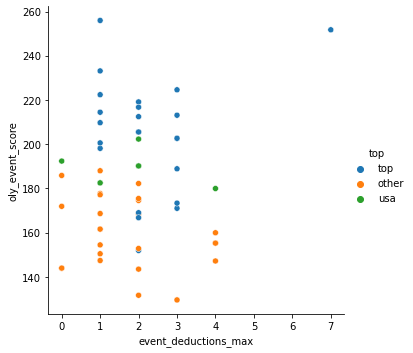

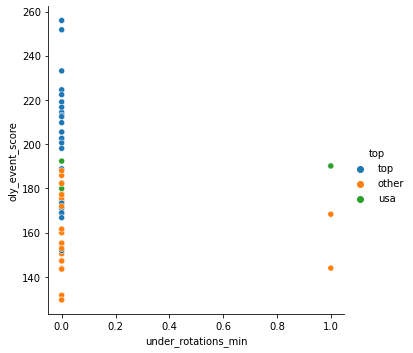

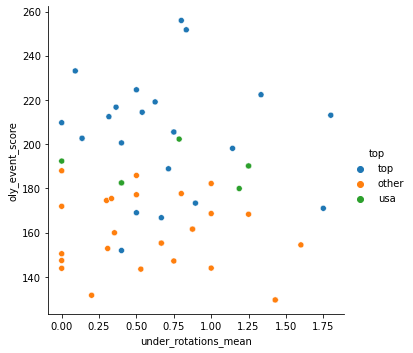

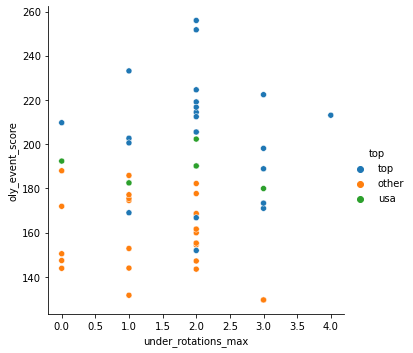

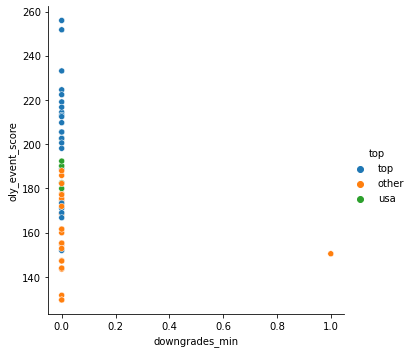

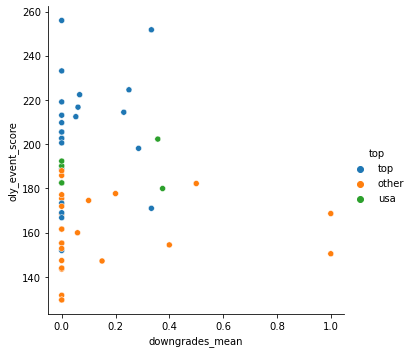

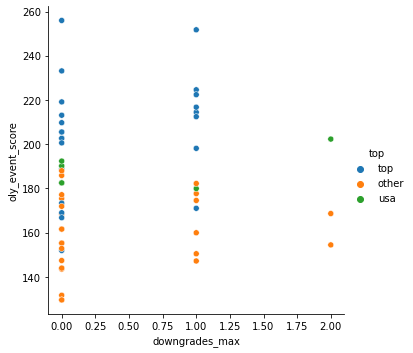

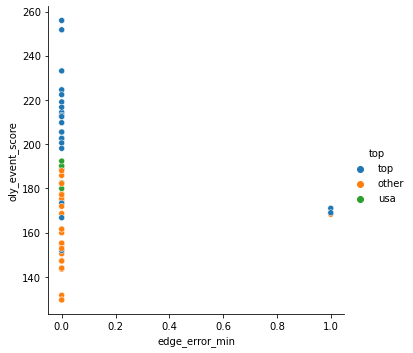

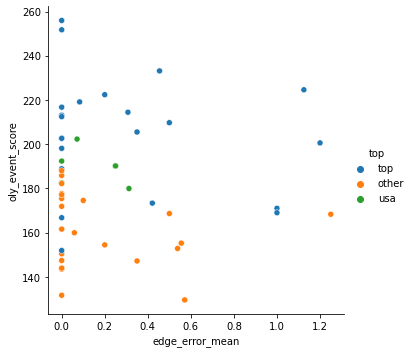

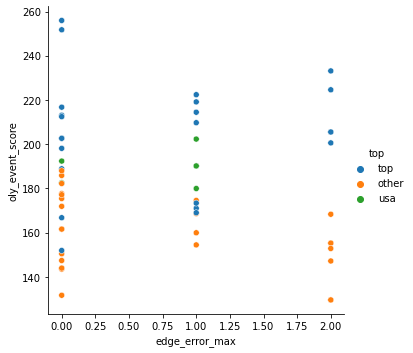

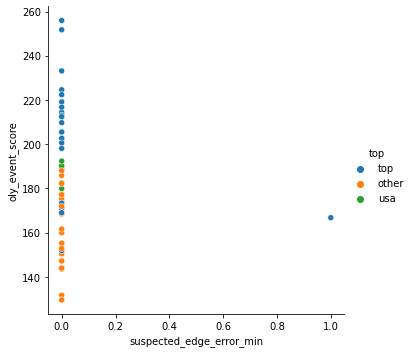

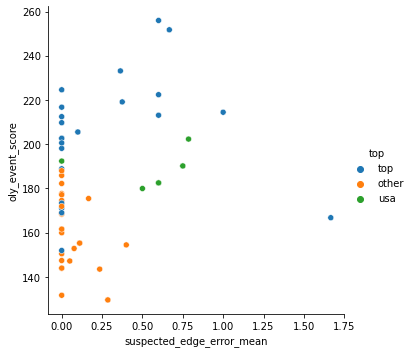

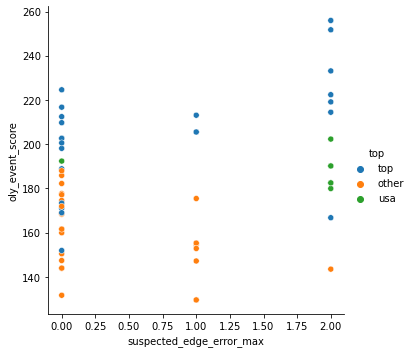

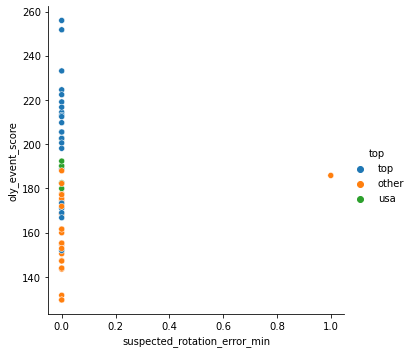

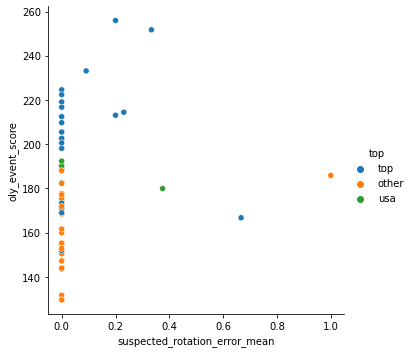

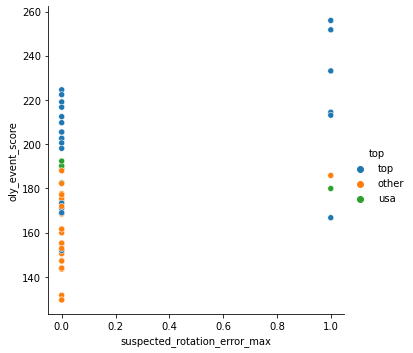

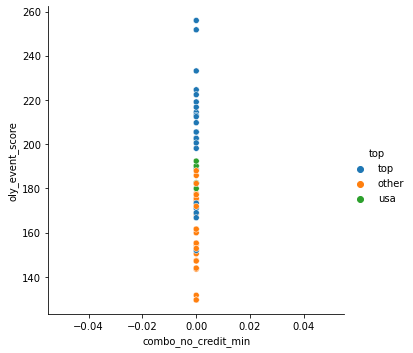

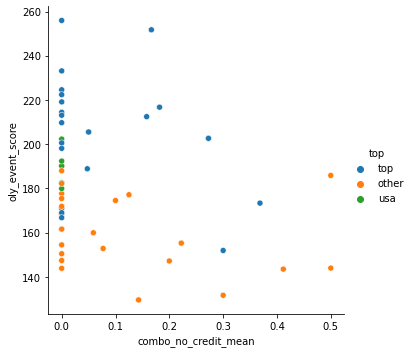

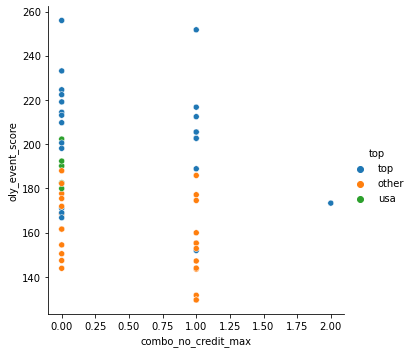

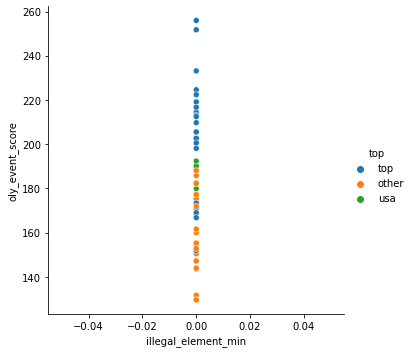

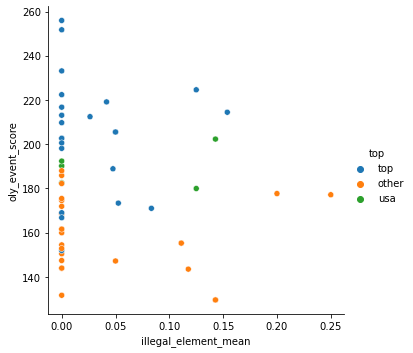

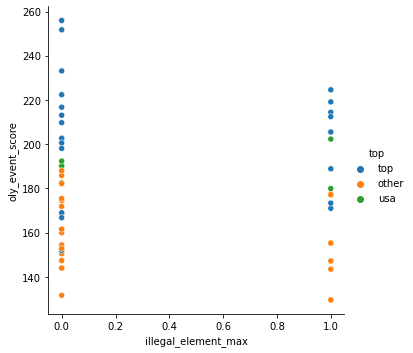

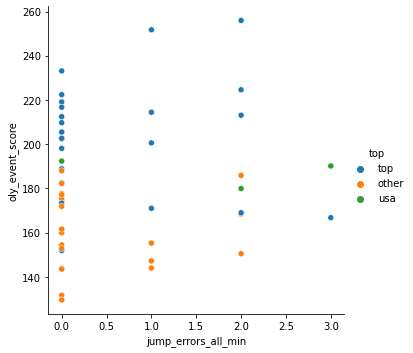

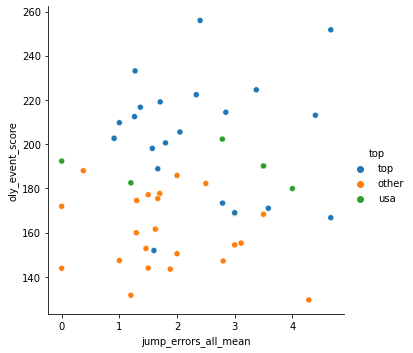

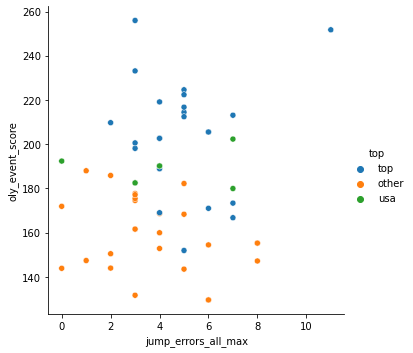

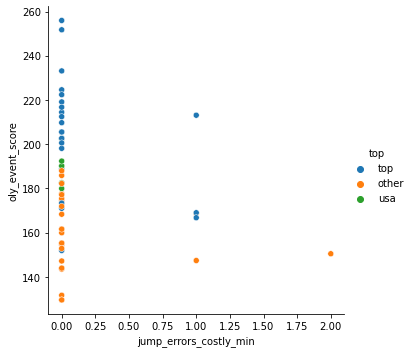

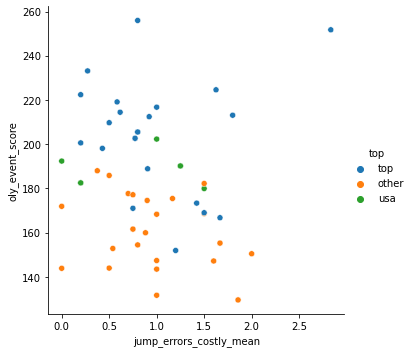

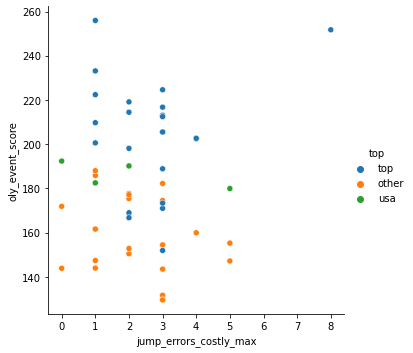

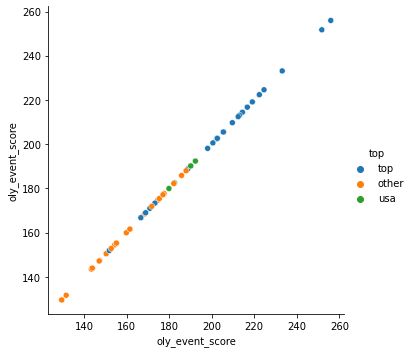

In [230]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.relplot(x=col, y='oly_event_score', data=train, hue='top')

In [218]:
train['top'] = (train.country == 'canada') | (train.country == 'russia') | (train.country == 'japan') | (train.country == 'south_korea') | (train.country == 'italy')
usa = pd.DataFrame(train[(train.country == 'usa')])

In [198]:
pd.set_option('display.max_columns', None)
 
# set colwidth hidher
pd.set_option('display.max_colwidth', 100)

In [219]:
train['top'] = train.top.replace({True: 'yes', False:'no'})

In [227]:
def map_score(country):
  if country == 'usa':
    return "usa"
  elif (country == 'canada') | (country == 'russia') | (country == 'japan') | (country == 'south_korea') | (country == 'italy'):
    return 'top'
  else:
    return 'other'

train["top"] = train["country"].apply(lambda country: map_score(country))

In [228]:
train

,skater_name,event_final_place_min,event_final_place_mean,event_final_place_max,short_score_min,short_score_mean,short_score_max,free_score_min,free_score_mean,free_score_max,event_score_min,event_score_mean,event_score_max,short_elements_score_min,short_elements_score_mean,short_elements_score_max,short_components_score_min,short_components_score_mean,short_components_score_max,free_elements_score_min,free_elements_score_mean,free_elements_score_max,free_components_score_min,free_components_score_mean,free_components_score_max,season_min,season_mean,season_max,free_deductions_min,free_deductions_mean,free_deductions_max,short_deductions_min,short_deductions_mean,short_deductions_max,event_deductions_min,event_deductions_mean,event_deductions_max,under_rotations_min,under_rotations_mean,under_rotations_max,downgrades_min,downgrades_mean,downgrades_max,edge_error_min,edge_error_mean,edge_error_max,suspected_edge_error_min,suspected_edge_error_mean,suspected_edge_error_max,suspected_rotation_error_min,suspected_rotation_error_mean,suspected_rotation_error_max,combo_no_credit_min,combo_no_credit_mean,combo_no_credit_max,illegal_element_min,illegal_element_mean,illegal_element_max,jump_errors_all_min,jump_errors_all_mean,jump_errors_all_max,jump_errors_costly_min,jump_errors_costly_mean,jump_errors_costly_max,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score,top
9,Kanako Murakami,1.0,4.333333,8.0,49.24,57.075833,66.64,94.06,109.609167,123.09,150.16,166.685000,189.73,21.81,29.343333,36.87,26.29,27.815833,29.77,44.10,53.643333,60.98,52.52,56.299167,62.11,2011.0,2012.500000,2014.0,0.0,0.333333,3.0,0.0,0.083333,1.0,0.0,0.416667,3.0,0.0,1.750000,3.0,0.0,0.333333,1.0,1.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.083333,1.0,1.0,3.583333,6.0,0.0,0.750000,3.0,japan,12.0,55.60,26.72,28.88,56.96,58.42,115.38,170.98,top
2,Anastasia Gimazetdinova,7.0,13.300000,21.0,34.54,43.533000,50.84,60.29,72.082000,80.93,94.83,117.515000,149.43,15.10,23.462000,29.99,19.44,20.371000,21.80,26.64,33.624000,42.60,29.44,38.858000,42.16,2004.0,2007.700000,2010.0,0.0,0.400000,1.0,0.0,0.300000,1.0,0.0,0.700000,2.0,0.0,0.200000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.300000,1.0,0.0,0.000000,0.0,0.0,1.200000,3.0,0.0,1.000000,3.0,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65,other
15,Yuna Kim,1.0,1.625000,3.0,58.32,67.020417,76.28,105.80,125.640000,148.34,168.48,192.660417,218.31,27.02,35.418750,44.00,20.94,28.642500,33.18,40.20,59.818333,74.73,38.79,58.354167,73.61,2007.0,2009.291667,2014.0,0.0,0.500000,2.0,0.0,0.083333,1.0,0.0,0.583333,2.0,0.0,0.625000,2.0,0.0,0.000000,0.0,0.0,0.083333,1.0,0.0,0.375000,2.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.041667,1.0,0.0,1.708333,4.0,0.0,0.583333,2.0,south_korea,2.0,74.92,39.03,35.89,69.69,74.50,144.19,219.11,top
10,Kaori Sakamoto,1.0,3.454545,6.0,64.08,71.608182,76.86,125.12,140.327273,153.91,194.00,211.935455,229.51,31.88,38.077273,41.98,30.29,33.621818,35.80,61.86,71.512727,80.07,63.66,68.996364,73.84,2018.0,2020.090909,2022.0,0.0,0.181818,1.0,0.0,0.090909,1.0,0.0,0.272727,1.0,0.0,0.090909,1.0,0.0,0.000000,0.0,0.0,0.454545,2.0,0.0,0.363636,2.0,0.0,0.090909,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.272727,3.0,0.0,0.272727,1.0,japan,3.0,79.84,43.22,36.62,78.90,74.39,153.29,233.13,top
19,Xiangning Li,8.0,11.400000,14.0,54.55,56.576000,59.20,102.72,110.394000,117.09,157.27,166.970000,175.37,27.66,30.591000,33.49,24.79,26.943000,29.97,50.41,56.192000,63.43,49.54,53.556000,58.35,2017.0,2017.600000,2018.0,0.0,0.400000,1.0,0.0,0.000000,0.0,0.0,0.400000,1.0,0.0,1.600000,2.0,0.0,0.400000,2.0,0.0,0.200000,1.0,0.0,0.400000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,3.000000,6.0,0.0,0.800000,3.0,china,22.0,52.46,27.27,26.19,50.56,51.41,101.97,154.43,other
0,Adelina Sotnikova,2.0,4.000000,9.0,53.74,60.201250,68.38,

In [254]:
train

,skater_name,event_final_place_min,event_final_place_mean,event_final_place_max,short_score_min,short_score_mean,short_score_max,free_score_min,free_score_mean,free_score_max,event_score_min,event_score_mean,event_score_max,short_elements_score_min,short_elements_score_mean,short_elements_score_max,short_components_score_min,short_components_score_mean,short_components_score_max,free_elements_score_min,free_elements_score_mean,free_elements_score_max,free_components_score_min,free_components_score_mean,free_components_score_max,season_min,season_mean,season_max,free_deductions_min,free_deductions_mean,free_deductions_max,short_deductions_min,short_deductions_mean,short_deductions_max,event_deductions_min,event_deductions_mean,event_deductions_max,under_rotations_min,under_rotations_mean,under_rotations_max,downgrades_min,downgrades_mean,downgrades_max,edge_error_min,edge_error_mean,edge_error_max,suspected_edge_error_min,suspected_edge_error_mean,suspected_edge_error_max,suspected_rotation_error_min,suspected_rotation_error_mean,suspected_rotation_error_max,combo_no_credit_min,combo_no_credit_mean,combo_no_credit_max,illegal_element_min,illegal_element_mean,illegal_element_max,jump_errors_all_min,jump_errors_all_mean,jump_errors_all_max,jump_errors_costly_min,jump_errors_costly_mean,jump_errors_costly_max,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score,top
9,Kanako Murakami,1.0,4.333333,8.0,49.24,57.075833,66.64,94.06,109.609167,123.09,150.16,166.685000,189.73,21.81,29.343333,36.87,26.29,27.815833,29.77,44.10,53.643333,60.98,52.52,56.299167,62.11,2011.0,2012.500000,2014.0,0.0,0.333333,3.0,0.0,0.083333,1.0,0.0,0.416667,3.0,0.0,1.750000,3.0,0.0,0.333333,1.0,1.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.083333,1.0,1.0,3.583333,6.0,0.0,0.750000,3.0,japan,12.0,55.60,26.72,28.88,56.96,58.42,115.38,170.98,top
2,Anastasia Gimazetdinova,7.0,13.300000,21.0,34.54,43.533000,50.84,60.29,72.082000,80.93,94.83,117.515000,149.43,15.10,23.462000,29.99,19.44,20.371000,21.80,26.64,33.624000,42.60,29.44,38.858000,42.16,2004.0,2007.700000,2010.0,0.0,0.400000,1.0,0.0,0.300000,1.0,0.0,0.700000,2.0,0.0,0.200000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.300000,1.0,0.0,0.000000,0.0,0.0,1.200000,3.0,0.0,1.000000,3.0,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65,other
15,Yuna Kim,1.0,1.625000,3.0,58.32,67.020417,76.28,105.80,125.640000,148.34,168.48,192.660417,218.31,27.02,35.418750,44.00,20.94,28.642500,33.18,40.20,59.818333,74.73,38.79,58.354167,73.61,2007.0,2009.291667,2014.0,0.0,0.500000,2.0,0.0,0.083333,1.0,0.0,0.583333,2.0,0.0,0.625000,2.0,0.0,0.000000,0.0,0.0,0.083333,1.0,0.0,0.375000,2.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.041667,1.0,0.0,1.708333,4.0,0.0,0.583333,2.0,south_korea,2.0,74.92,39.03,35.89,69.69,74.50,144.19,219.11,top
10,Kaori Sakamoto,1.0,3.454545,6.0,64.08,71.608182,76.86,125.12,140.327273,153.91,194.00,211.935455,229.51,31.88,38.077273,41.98,30.29,33.621818,35.80,61.86,71.512727,80.07,63.66,68.996364,73.84,2018.0,2020.090909,2022.0,0.0,0.181818,1.0,0.0,0.090909,1.0,0.0,0.272727,1.0,0.0,0.090909,1.0,0.0,0.000000,0.0,0.0,0.454545,2.0,0.0,0.363636,2.0,0.0,0.090909,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.272727,3.0,0.0,0.272727,1.0,japan,3.0,79.84,43.22,36.62,78.90,74.39,153.29,233.13,top
19,Xiangning Li,8.0,11.400000,14.0,54.55,56.576000,59.20,102.72,110.394000,117.09,157.27,166.970000,175.37,27.66,30.591000,33.49,24.79,26.943000,29.97,50.41,56.192000,63.43,49.54,53.556000,58.35,2017.0,2017.600000,2018.0,0.0,0.400000,1.0,0.0,0.000000,0.0,0.0,0.400000,1.0,0.0,1.600000,2.0,0.0,0.400000,2.0,0.0,0.200000,1.0,0.0,0.400000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,3.000000,6.0,0.0,0.800000,3.0,china,22.0,52.46,27.27,26.19,50.56,51.41,101.97,154.43,other
0,Adelina Sotnikova,2.0,4.000000,9.0,53.74,60.201250,68.38,

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/686462139.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/686462139.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details an

AttributeError: 'Rectangle' object has no property 'bins'

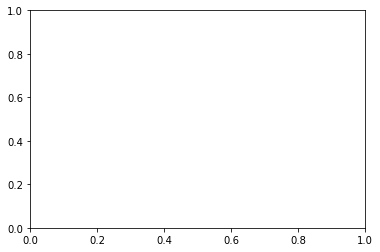

In [265]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.barplot(x=col, y='oly_event_score', data=train, hue='top', bins=10)

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3628491184.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3628491184.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

<Figure size 432x288 with 0 Axes>

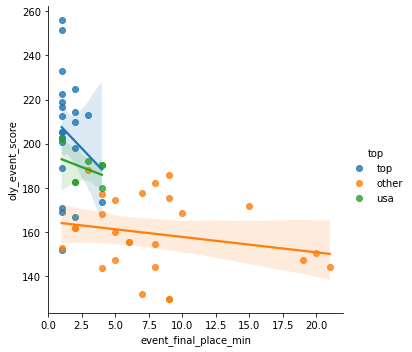

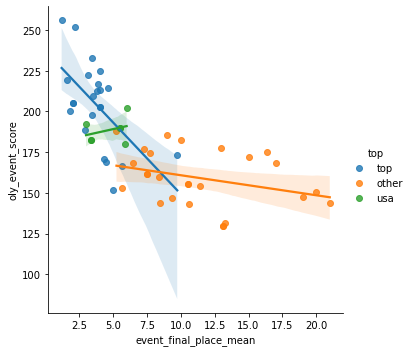

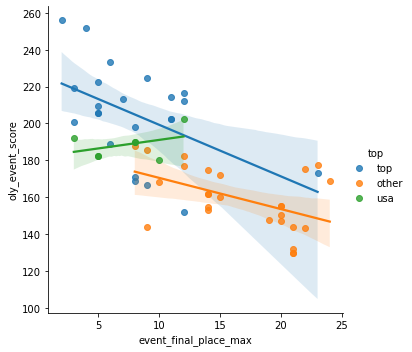

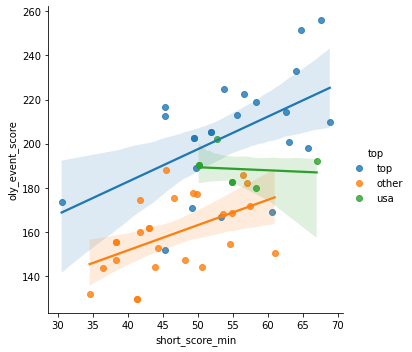

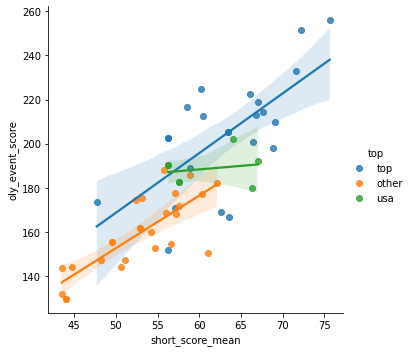

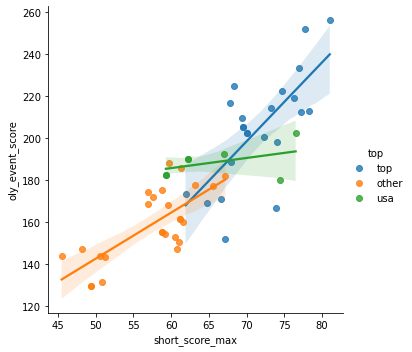

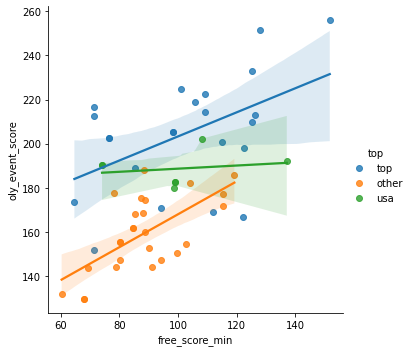

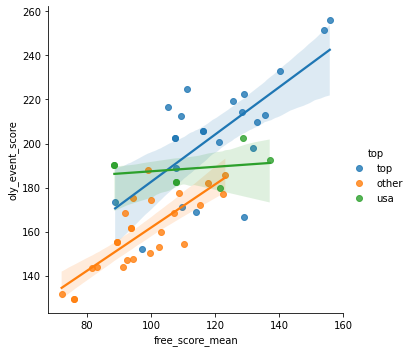

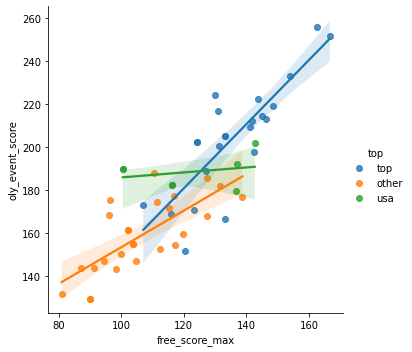

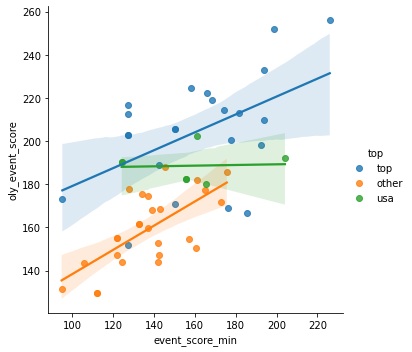

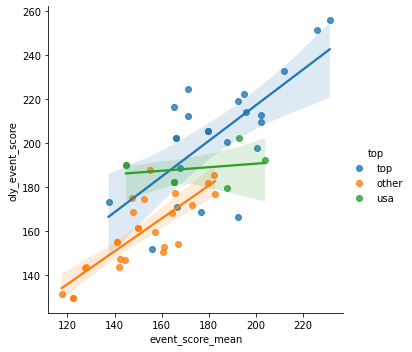

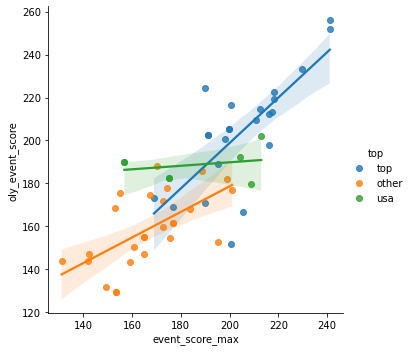

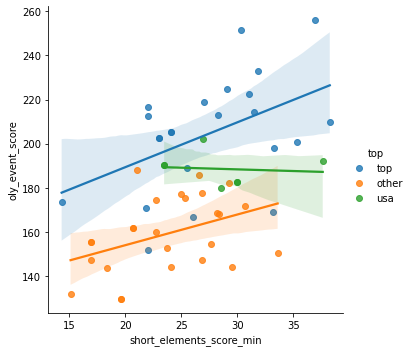

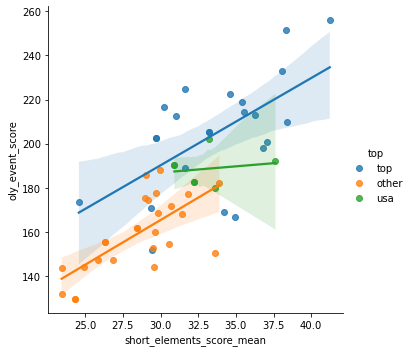

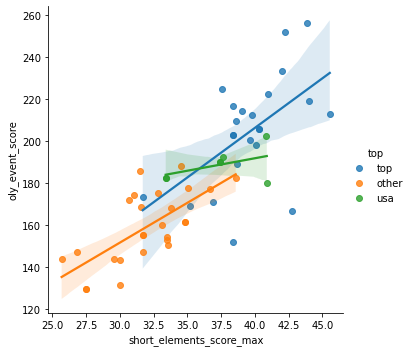

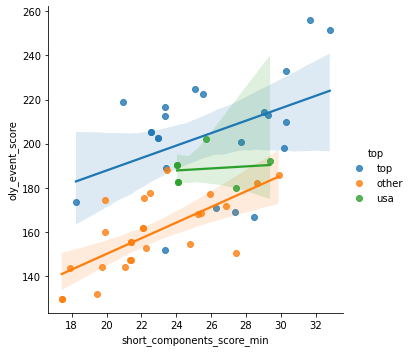

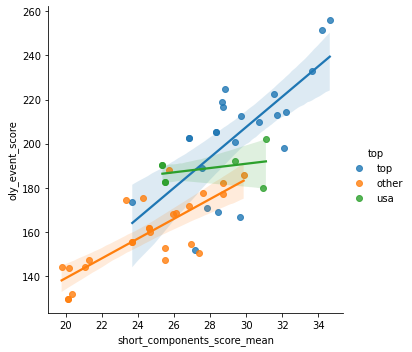

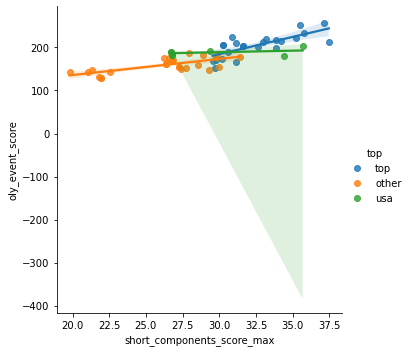

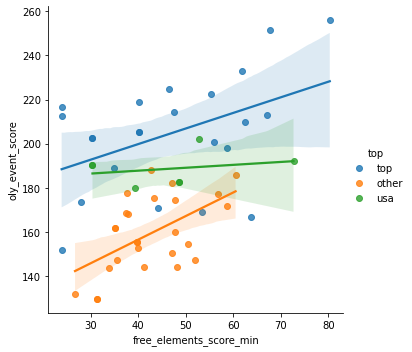

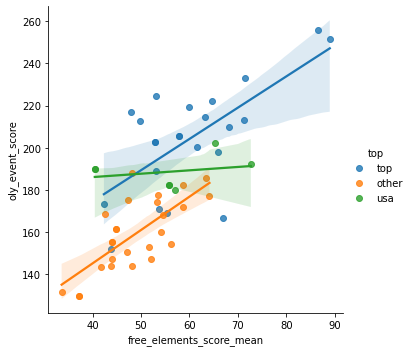

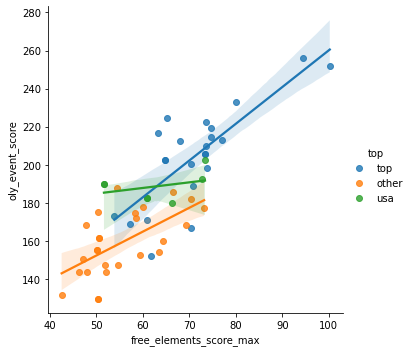

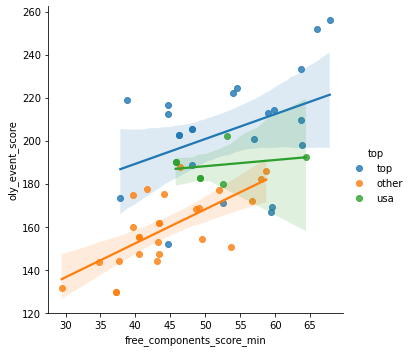

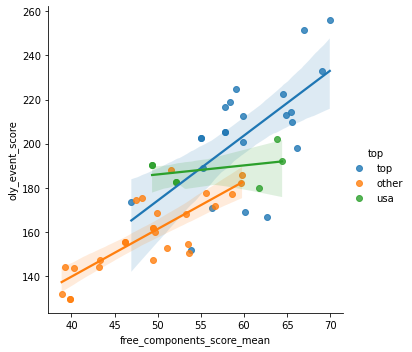

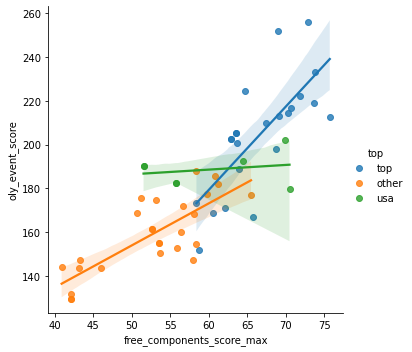

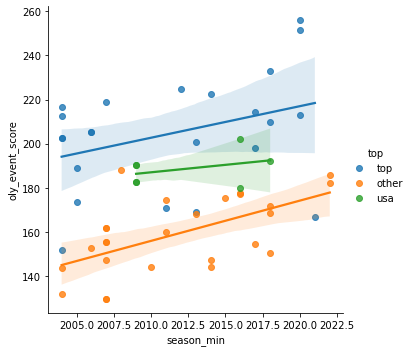

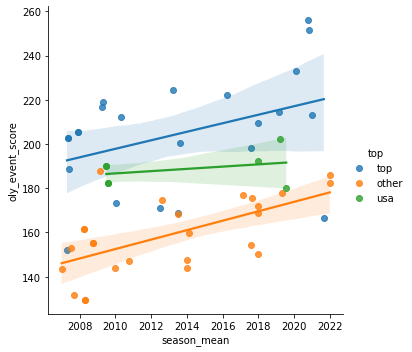

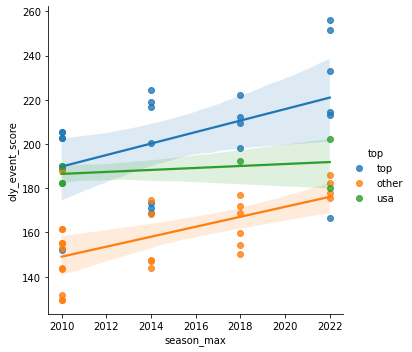

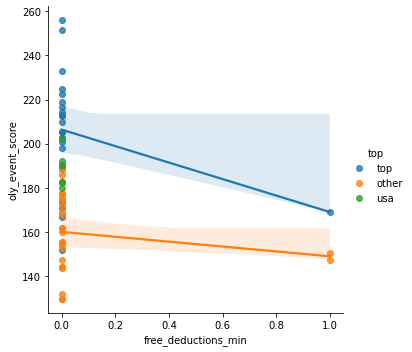

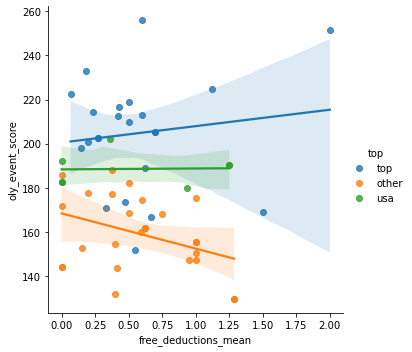

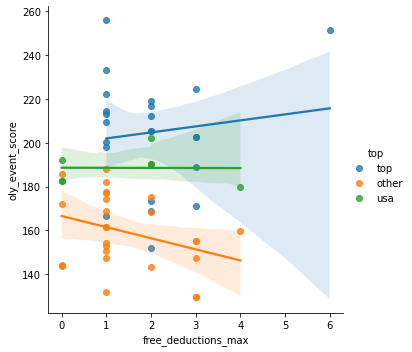

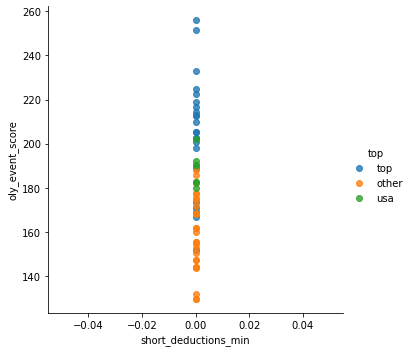

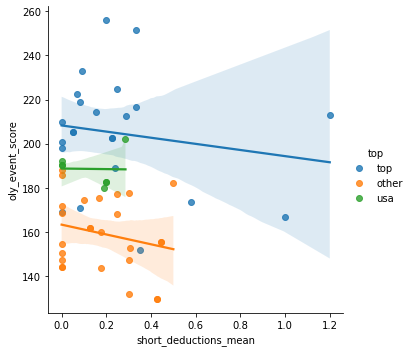

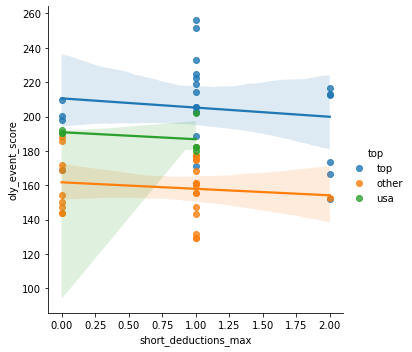

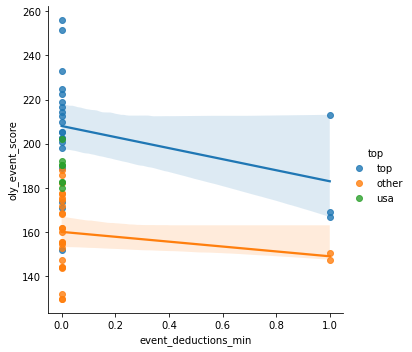

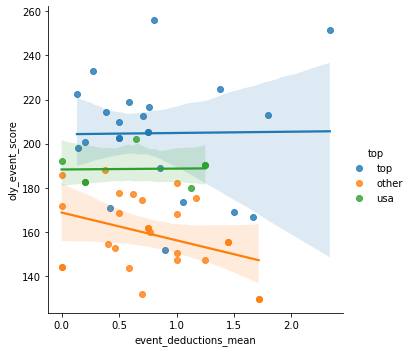

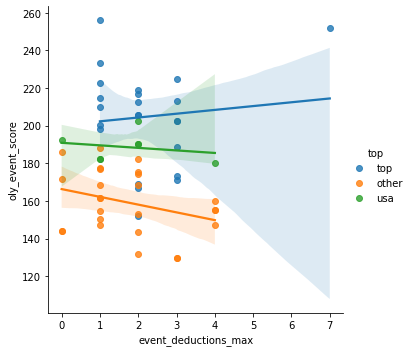

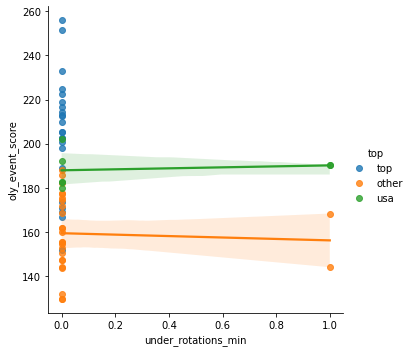

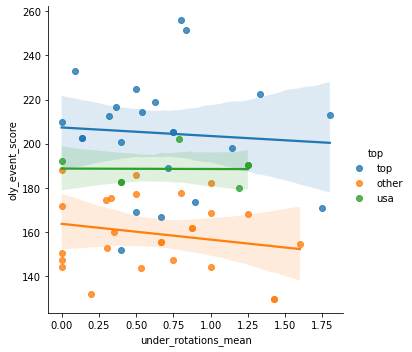

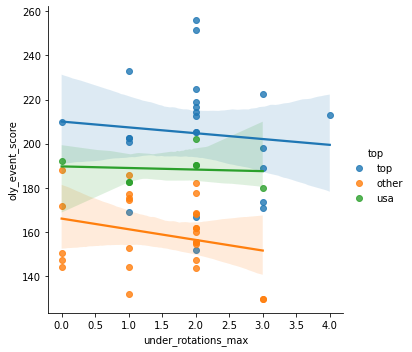

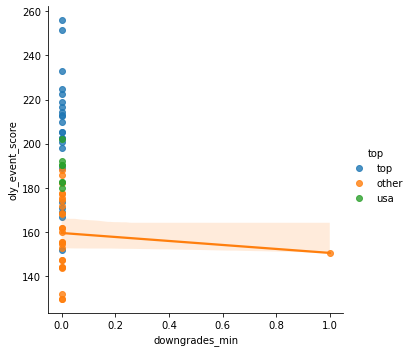

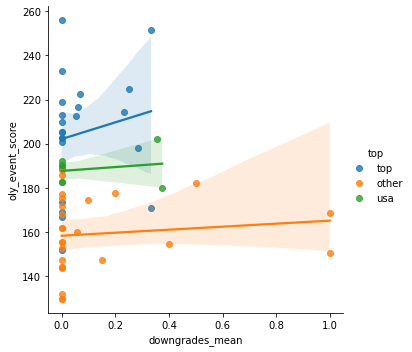

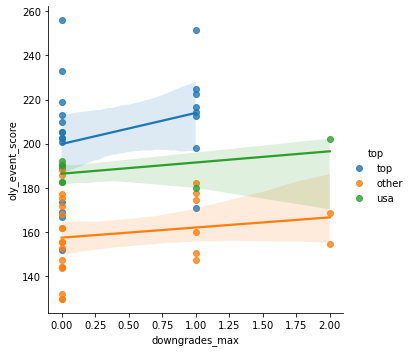

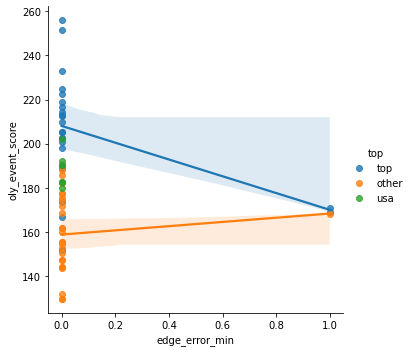

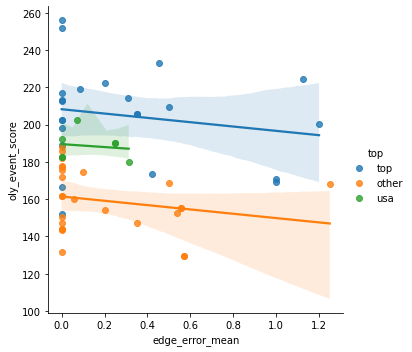

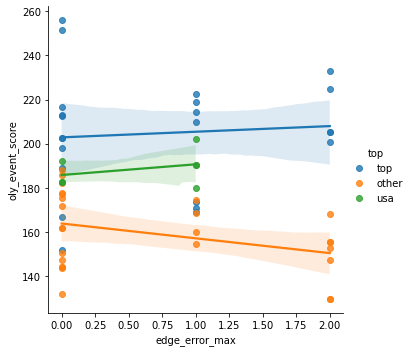

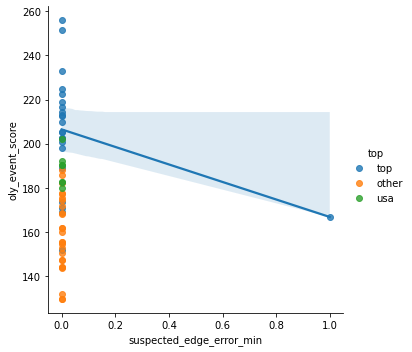

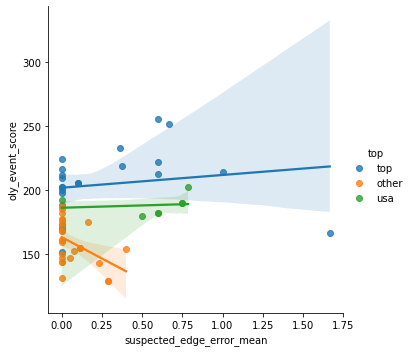

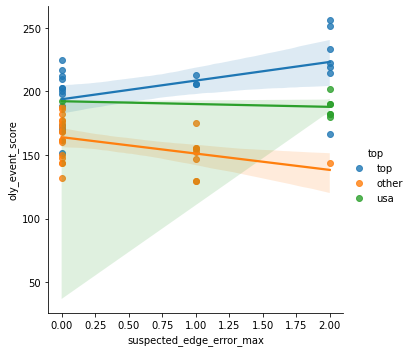

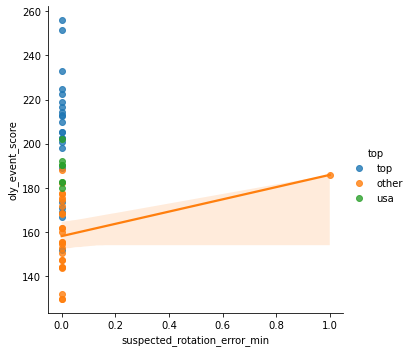

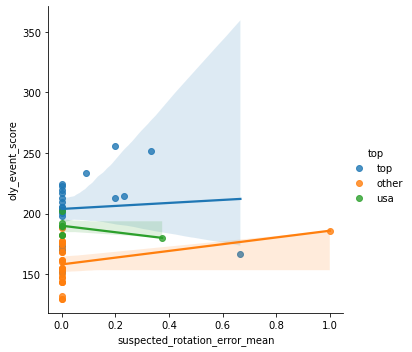

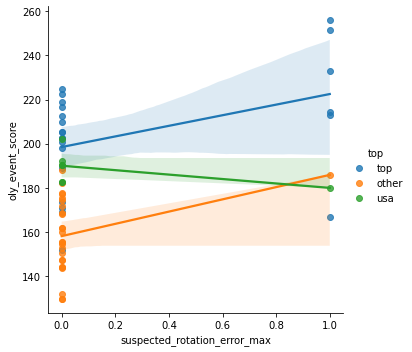

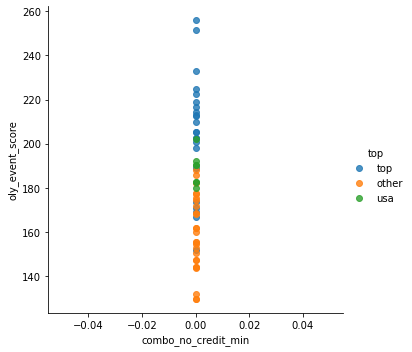

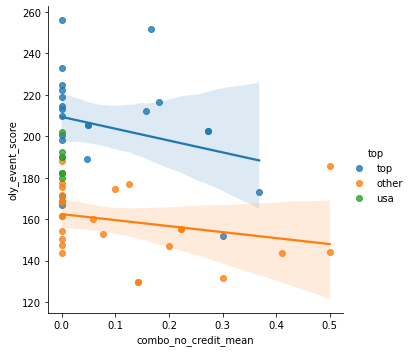

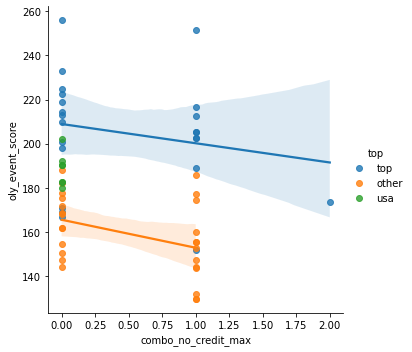

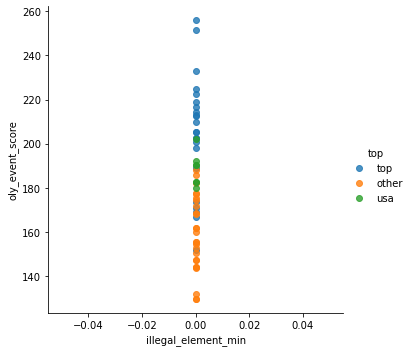

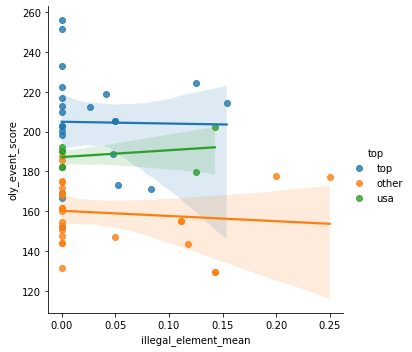

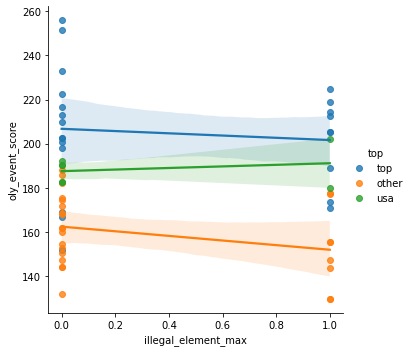

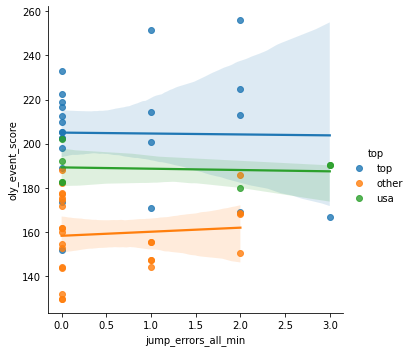

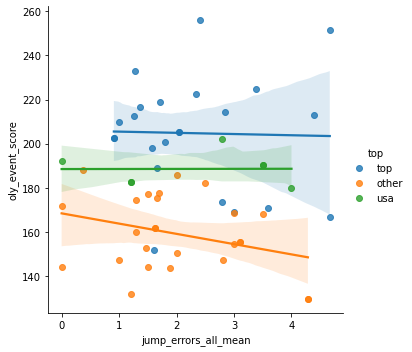

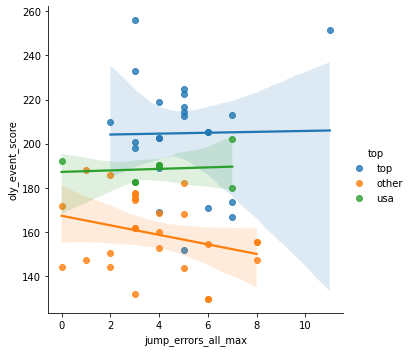

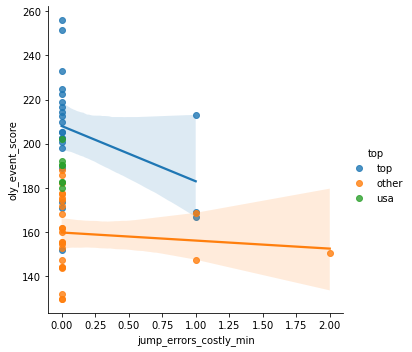

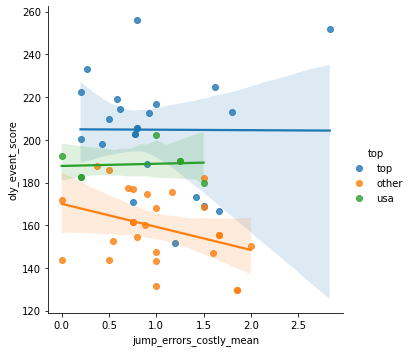

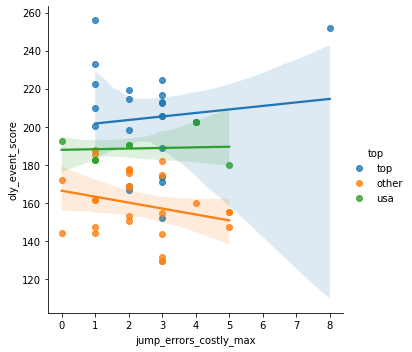

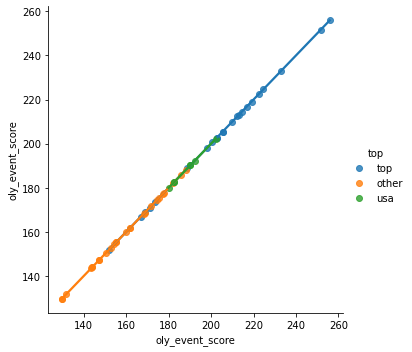

In [264]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.lmplot(x=col, y='oly_event_score', data=train, hue='top')

In [244]:
for i, col in enumerate(train.columns):
    plt.figure(i)
    train[col].value_counts().plot.(kind = 'bar', color = ["cornflowerblue", "goldenrod", "indianred", "mediumseagreen"])

SyntaxError: invalid syntax (4065818252.py, line 3)